## Tarea 2: Construir una red densa capaz de predecir si un trabajador va a renunciar de una compañía.


### a) Cargado de los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

/Library/Python/3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df=pd.read_csv('/Users/erickavendanogarcia/Downloads/renuncias.csv')
df 

,nivel_satisfaccion,ultima_evaluacion,numero_de_proyecto,promedio_horas_mensuales,tiempo_en_la_compania,accidente_de_trabajo,renuncia,promocion_ultimos_5anios,ventas,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df['renuncia'].value_counts()

renuncia
0    11428
1     3571
Name: count, dtype: int64

### b) En la tabla adjunta se muestra la información de ~15000 trabajadores de una compañía. La columna que servirá como etiqueta se llama "renuncia", donde 0 representa que no ha renunciado y 1 que si renunció. Elaborar la red neuronal

In [4]:
from sklearn.model_selection import train_test_split

# Sabiendo que nuestras etiquetas deben ser las renuncias (será nuestra y) y el resto de parámetros serán la x
X = df.drop(columns=['renuncia'])
y = df['renuncia']


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# reprocesamiento: codificamos las variables categóricas y escalar Variables categóricas
cat_features = ['ventas', 'salario']
# Variables numéricas
num_features = list(set(X.columns) - set(cat_features))

# Crear un transformador para columnas numéricas y categóricas
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
])


In [6]:
# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


### c) Construcción del modelo

In [8]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    #layers.Dropout(0.1),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [9]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [10]:
history = model.fit(X_train_transformed,
                    y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test_transformed, y_test))

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.7253 - loss: 0.5238 - val_accuracy: 0.9371 - val_loss: 0.2062
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.9461 - loss: 0.1905 - val_accuracy: 0.9536 - val_loss: 0.1641
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9529 - loss: 0.1577 - val_accuracy: 0.9556 - val_loss: 0.1541
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.9555 - loss: 0.1485 - val_accuracy: 0.9571 - val_loss: 0.1489
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.9562 - loss: 0.1525 - val_accuracy: 0.9549 - val_loss: 0.1428
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.9586 - loss: 0.1334 - val_accuracy: 0.9571 - val_loss: 0.1376
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.9602 - loss: 0.1358 - val_accuracy: 0.9564 - val_loss: 0.1363
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.9625 - loss: 0.1262 - 

### d) Graficando los datos de entrenamiento y de perdida

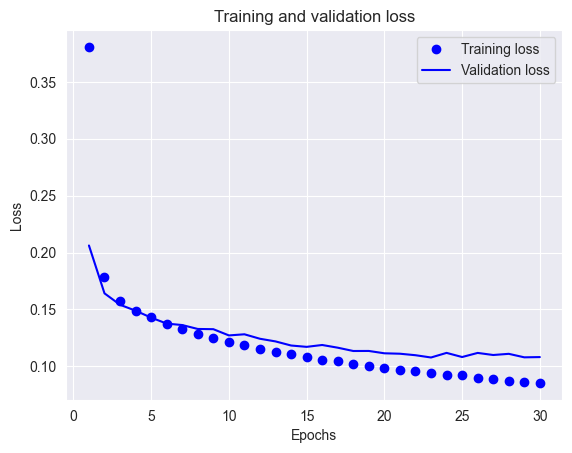

In [11]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

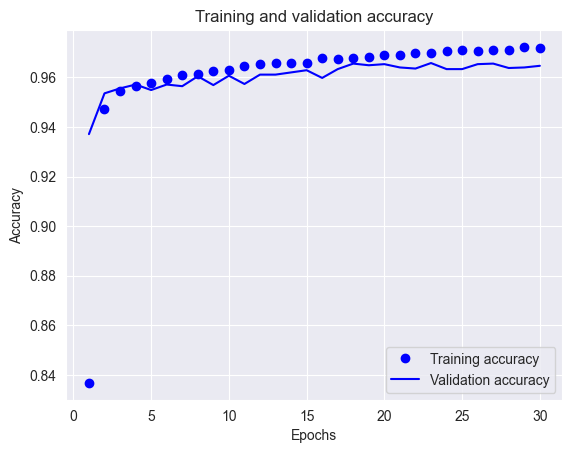

In [12]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### e) Un ejemplo particular

In [13]:
# Ejemplo de trabajador
nuevo_empleado1 = pd.DataFrame([{
    'nivel_satisfaccion': 0.9,
    'ultima_evaluacion': 0.6,
    'numero_de_proyecto': 2,
    'promedio_horas_mensuales': 196,
    'tiempo_en_la_compania': 3,
    'accidente_de_trabajo': 1,
    'promocion_ultimos_5anios': 0,
    'ventas': 'sales',
    'salario': 'low'
}])

nuevo_empleado_transformado = preprocessor.transform(nuevo_empleado1)

In [14]:
# Hacer la predicción (probabilidad de renuncia)
prediccion = model.predict(nuevo_empleado_transformado)

# Mostrar la probabilidad
print(f'Probabilidad de que renuncie: {prediccion[0][0]:.2f}')


clase = int(prediccion[0][0] > 0.5)
print(f'¿Renunciará? {"Sí" if clase == 1 else "No"}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Probabilidad de que renuncie: 0.00
¿Renunciará? No
